In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("/Users/vishalbarad/Desktop/Python/ML/clustring/heirarchical/hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv")

In [41]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [42]:
df.drop(['CustomerID','Genre','Age'],axis=1,inplace=True)

In [43]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Now let's draw dendrogram. For that scipy library is used

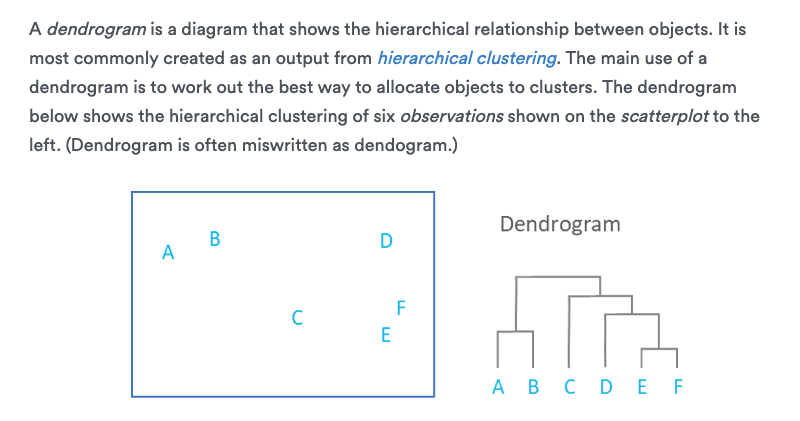

## For that scipy library is use we can not draw dandrogram using matplolib library

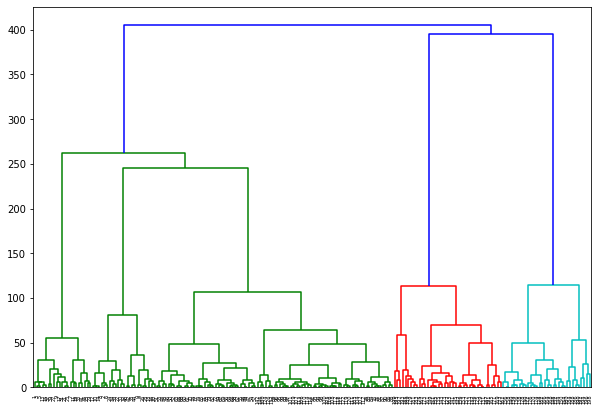

In [44]:
import scipy.cluster.hierarchy as sns
plt.figure(figsize=(10,7))
dend = sns.dendrogram(sns.linkage(df,method='ward', metric='euclidean'))

### If we draw a horizontal line that passes through longest distance without a horizontal line, we get 5 clusters as shown in the following figure:
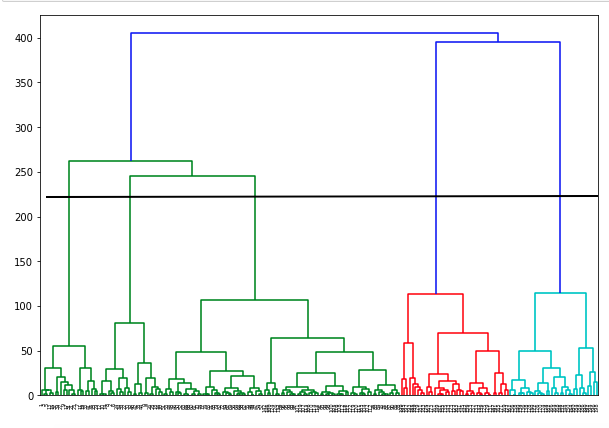

In [45]:
from sklearn.cluster import AgglomerativeClustering

In [46]:
ward_cluster = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward') # default linkage ='ward'
ward_pred = cluster.fit_predict(df)
ward_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [47]:
df['cluster'] = ward_pred
df.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


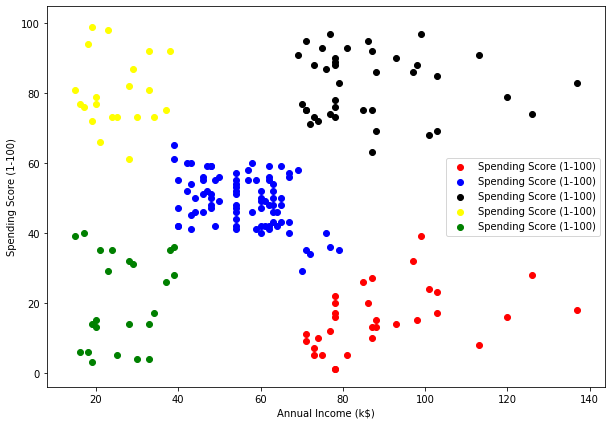

In [48]:
plt.figure(figsize=(10, 7))

df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
df3 = df[df.cluster==3]
df4 = df[df.cluster==4]

plt.scatter(df0['Annual Income (k$)'],df0['Spending Score (1-100)'],color='red',label='Spending Score (1-100)')
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='blue',label='Spending Score (1-100)')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='black',label='Spending Score (1-100)')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='yellow',label='Spending Score (1-100)')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='green',label='Spending Score (1-100)')


plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

Let's also try complete and average linkages

**Exercise**:
* Conduct hierarchical clustering with complete linkage, store the predicted labels in the variable ```complete_pred```
* Conduct hierarchical clustering with average linkage, store the predicted labels in the variable ```avg_pred```

In [49]:
df.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


In [50]:
complete = AgglomerativeClustering(n_clusters=5,linkage='complete')
complete_pred = complete.fit_predict(df)

In [51]:
avg = AgglomerativeClustering(n_clusters=5,linkage='average')
avg_pred = avg.fit_predict(df)

To determine which clustering result better matches the original labels of the samples, we can use ```adjusted_rand_score``` which is an *external cluster validation index* which results in a score between -1 and 1, where 1 means two clusterings are identical of how they grouped the samples in a dataset (regardless of what label is assigned to each cluster).

Cluster validation indices are discussed later in the course.

In [54]:
from sklearn.metrics import adjusted_rand_score
ward_score = adjusted_rand_score(df.cluster,ward_pred)
ward_score

1.0

In [55]:
# TODO: Calculated the adjusted Rand score for the complete linkage clustering labels
complete_ar_score = adjusted_rand_score(df.cluster, complete_pred)

# TODO: Calculated the adjusted Rand score for the average linkage clustering labels
avg_ar_score = adjusted_rand_score(df.cluster, avg_pred)

In [56]:
print( "Scores: \nWard:", ward_score,"\nComplete: ", complete_ar_score, "\nAverage: ", avg_ar_score)

Scores: 
Ward: 1.0 
Complete:  1.0 
Average:  0.6922783016064035
